In [1]:
import numpy as np

import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

import seaborn as sns

# Load Data

In [2]:
df_raw = read_csv('train_easy2use.csv')

# pd.set_option('display.max_rows', df_raw.shape[0]+1)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MOFname                      54074 non-null  object 
 1   volume                       54074 non-null  float64
 2   weight                       54074 non-null  float64
 3   density                      54074 non-null  float64
 4   surface_area                 54074 non-null  float64
 5   void_fraction                54074 non-null  float64
 6   void_volume                  54074 non-null  float64
 7   CO2/N2_selectivity           54074 non-null  float64
 8   heat_adsorption_CO2          54074 non-null  float64
 9   CO2_working_capacity         54074 non-null  float64
 10  mt_linker_nAtom              54074 non-null  int64  
 11  mt_linker_nBond              54074 non-null  int64  
 12  mt_linker_nRing              54074 non-null  int64  
 13  mt_linker_nHeavy

In [4]:
df = df_raw[df_raw['surface_area'] > 0]
df

,MOFname,volume,weight,density,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption_CO2,CO2_working_capacity,...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,mof_unit_298,1122.894081,739.185400,1.093110,1011.38,0.17922,0.1640,23.154877,5.680328,93.542937,...,0,0,0,0,1,0,0,0,0,0
1,mof_unit_309,1121.156365,771.222200,1.142254,908.98,0.14254,0.1248,33.153060,6.812856,204.448460,...,0,0,0,0,1,0,0,0,0,0
2,mof_unit_664,1132.690953,595.184200,0.872548,1890.74,0.28366,0.3251,11.986666,5.148416,73.375700,...,0,0,0,0,1,0,0,0,0,0
3,mof_unit_1528,1122.886509,692.191800,1.023623,1355.30,0.22398,0.2188,22.092426,6.186543,120.009000,...,0,0,0,0,1,0,0,0,0,0
4,mof_unit_1621,1124.864717,768.178500,1.133995,1140.20,0.18740,0.1653,32.646398,6.320088,160.814437,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54069,mof_unit_66223,103004.062240,20852.791680,0.336170,4865.61,0.71205,2.1181,3.875471,3.123313,-2.267491,...,0,0,0,0,0,0,0,0,1,0
54070,mof_unit_40001,29171.241696,6396.387900,0.364107,4568.11,0.64114,1.7609,5.867852,4.297833,55.146792,...,0,0,0,0,0,0,0,0,0,1
54071,mof_unit_64137,223964.854408,22595.928960,0.167533,6129.19,0.83977,5.0126,2.304666,2.530420,-18.345287,...,0,0,0,0,0,0,0,0,1,0
54072,mof_unit_30261,44655.137268,7983.159994,0.296861,2498.74,0.72919,2.4563,7.616618,4.595563,42.799232,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.max()

MOFname         mof_unit_9997
volume                 223965
weight                22595.9
density               2.98018
surface_area          7083.53
                    ...      
pts                         1
rht                         1
sra                         1
tbo                         1
the                         1
Length: 77, dtype: object

In [6]:
df_corr = df.corr()
df_corr.to_csv("correlation.csv", index=False)

In [7]:
df_train = df.drop(['MOFname'], axis = 1 )

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 0 to 54073
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       54074 non-null  float64
 1   weight                       54074 non-null  float64
 2   density                      54074 non-null  float64
 3   surface_area                 54074 non-null  float64
 4   void_fraction                54074 non-null  float64
 5   void_volume                  54074 non-null  float64
 6   CO2/N2_selectivity           54074 non-null  float64
 7   heat_adsorption_CO2          54074 non-null  float64
 8   CO2_working_capacity         54074 non-null  float64
 9   mt_linker_nAtom              54074 non-null  int64  
 10  mt_linker_nBond              54074 non-null  int64  
 11  mt_linker_nRing              54074 non-null  int64  
 12  mt_linker_nHeavyAtom         54074 non-null  int64  
 13  mt_linker_cLogP 

In [9]:
X = df_train.drop('CO2_working_capacity', axis = 1)
y = df_train['CO2_working_capacity'].values

In [10]:
y

array([ 93.54293702, 204.44846028,  73.37570022, ..., -18.34528694,
        42.79923153,  51.37165667])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43259 entries, 23912 to 15795
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       43259 non-null  float64
 1   weight                       43259 non-null  float64
 2   density                      43259 non-null  float64
 3   surface_area                 43259 non-null  float64
 4   void_fraction                43259 non-null  float64
 5   void_volume                  43259 non-null  float64
 6   CO2/N2_selectivity           43259 non-null  float64
 7   heat_adsorption_CO2          43259 non-null  float64
 8   mt_linker_nAtom              43259 non-null  int64  
 9   mt_linker_nBond              43259 non-null  int64  
 10  mt_linker_nRing              43259 non-null  int64  
 11  mt_linker_nHeavyAtom         43259 non-null  int64  
 12  mt_linker_cLogP              43259 non-null  float64
 13  mt_linker_MW

In [13]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

In [14]:
mean = X_train_np.mean(axis = 0)
std = X_train_np.std(axis = 0)

X_train_np = (X_train_np - mean) / std
X_test_np = (X_test_np - mean) / std

print(X_train_np[0])

[ 0.09547696  0.02182264 -0.89837868  0.28556491  0.28994653  0.16519076
  1.52581547  0.50534246 -0.08341324 -0.22007567 -1.19530254 -0.08341324
 -0.39951539 -0.39258968  2.82695697 -1.46058179 -0.21307075 -0.22378042
  1.367576    1.26340918  0.67150752  1.367576    1.63990313  1.37556236
  2.31886848  0.73294215  0.56644538  0.1802263  -0.43527091 -0.34938116
  1.23156519  0.31493061  0.32075219  0.20605742  0.31493061  0.97346437
  0.28698051 -0.63688902  0.96148301  0.61424632 -0.89073961 -0.50573461
 -0.51527188  0.82977981 -0.28614805 -0.27111664 -0.27410167 -0.39505752
  3.21407493 -0.34039939 -0.33632618 -0.27691832 -0.31407208 -0.29014731
 -0.25447651 -0.24353431 -0.30269974 -0.33662417 -0.21154661 -0.27764343
 -0.31664171 -0.37072482 -0.36350816 -0.3062804  -0.28019475 -0.22218112
 -0.21238016 -0.11410593 -0.24289457 -1.37004688 -0.06073792 -0.00832794
  2.82695697 -0.02040273 -0.02544962]


In [15]:
sample_size = X_train_np.shape[0]
time_steps = X_train_np.shape[1]

input_dimension = 1

X_train_reshaped = X_train_np.reshape(sample_size, time_steps, input_dimension)

In [16]:
X_test_reshaped = X_test_np.reshape(X_test_np.shape[0],X_test_np.shape[1],1)

# CNN Model

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error

In [81]:
def build_conv1D_model():

    n_timesteps = X_train_reshaped.shape[1] #75
    n_features  = X_train_reshaped.shape[2] #1
    
    model = Sequential(name="model_conv1D")
    
    model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
    
    model.add(keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))

    model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu'))

    model.add(keras.layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
              
    model.add(keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss='mean_absolute_error',optimizer=optimizer)
    
    return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto', restore_best_weights=True)

Model: "model_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 69, 64)            512       
_________________________________________________________________
dropout_8 (Dropout)          (None, 69, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 67, 32)            6176      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 66, 16)            1040      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 33, 16)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 528)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

In [82]:
history = model_conv1D.fit(X_train_reshaped, y_train, epochs=20, validation_split=0.2, verbose=1, callbacks=[monitor])

Epoch 1/20
1082/1082 [==============================] - 8s 7ms/step - loss: 33.3126 - val_loss: 21.6162
Epoch 2/20
1082/1082 [==============================] - 7s 6ms/step - loss: 22.2804 - val_loss: 20.7010
Epoch 3/20
1082/1082 [==============================] - 7s 6ms/step - loss: 21.5325 - val_loss: 19.7882
Epoch 4/20
1082/1082 [==============================] - 7s 7ms/step - loss: 21.0406 - val_loss: 19.9292
Epoch 5/20
1082/1082 [==============================] - 7s 7ms/step - loss: 20.6036 - val_loss: 20.6390
Epoch 6/20
1082/1082 [==============================] - 7s 6ms/step - loss: 20.2570 - val_loss: 19.3178
Epoch 7/20
1082/1082 [==============================] - 7s 7ms/step - loss: 20.1461 - val_loss: 18.8186
Epoch 8/20
1082/1082 [==============================] - 7s 7ms/step - loss: 19.9222 - val_loss: 18.5775
Epoch 9/20
1082/1082 [==============================] - 7s 7ms/step - loss: 19.8064 - val_loss: 20.8015
Epoch 10/20
1082/1082 [==============================] - 7s 7ms/

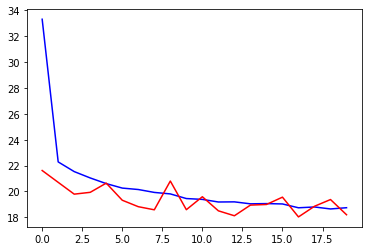

In [83]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [84]:
y_train_pred = model_conv1D.predict(X_train_reshaped)
y_test_pred = model_conv1D.predict(X_test_reshaped)

In [85]:
log_mae = np.log10(mean_absolute_error(y_test_pred, y_test))
log_mae

1.2596576166531386

In [86]:
num = y_test.size
real = y_test[:num]
predicted = [y_test_pred[i][0] for i in range(0,num)]
  
dict = { 
    'real': real,
    'predicted': predicted
}
    
predict = pd.DataFrame(dict)

predict

,real,predicted
0,60.376913,64.329010
1,119.025969,95.377037
2,83.535171,70.681305
3,180.985800,132.289001
4,74.578118,60.920101
...,...,...
10810,72.541568,60.140343
10811,75.438002,72.794113
10812,76.132644,57.891178
10813,57.702012,69.287201


# Submission

In [87]:
df_test_raw = read_csv('test_easy2use.csv')

In [88]:
df_test_raw

,MOFname,volume,weight,density,surface_area,void_fraction,void_volume,CO2/N2_selectivity,heat_adsorption_CO2,mt_linker_nAtom,...,bcu,etb,fof,nbo,pcu,pts,rht,sra,tbo,the
0,mof_unit_68614,1208.301332,797.70936,1.096273,586.54,0.11392,0.1039,36.639791,7.005640,14,...,0,0,0,0,1,0,0,0,0,0
1,mof_unit_68615,4126.414623,3733.65779,1.502488,852.49,0.21367,0.1422,18.390691,5.119399,22,...,0,0,0,0,0,0,0,0,0,0
2,mof_unit_68616,1602.148373,747.21048,0.774443,3155.73,0.33883,0.4375,13.062850,5.045400,14,...,0,0,0,0,1,0,0,0,0,0
3,mof_unit_68617,2436.629312,995.80232,0.678630,3521.09,0.40464,0.5963,9.601198,5.106238,14,...,0,0,0,0,1,0,0,0,0,0
4,mof_unit_68618,3123.418006,1337.53800,0.711091,2678.46,0.38959,0.5479,12.974954,5.287639,14,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,mof_unit_85609,32660.944605,4723.68288,0.240160,5720.14,0.77614,3.2318,4.536626,3.146698,14,...,0,0,0,1,0,0,0,0,0,0
16996,mof_unit_85610,5070.998617,1499.13262,0.490903,4017.28,0.59192,1.2058,6.745508,3.658871,14,...,0,0,0,1,0,0,0,0,0,0
16997,mof_unit_85611,4669.804446,1322.04892,0.470109,4288.76,0.54950,1.1689,4.666206,3.593052,14,...,0,0,0,0,1,0,0,0,0,0
16998,mof_unit_85612,4682.120862,1213.51148,0.430379,4331.86,0.60643,1.4091,4.823305,3.454497,14,...,0,0,0,0,1,0,0,0,0,0


In [89]:
df_test = df_test_raw.drop(['MOFname'], axis = 1)
# df_test.info()

df_test_np = df_test.to_numpy()

In [90]:
mean = df_test_np.mean(axis = 0)
std = df_test_np.std(axis = 0)

df_test_np = (df_test_np - mean) / std

print(df_test_np[0])

[-0.51943362 -0.66741203  0.7435829  -1.29325477 -1.34726168 -0.72694635
  1.02922402  1.26000287 -0.38441764 -0.22312933 -0.31415656 -0.38441764
  0.40730378 -0.46149467 -0.34337476  0.37927796 -0.21712568 -0.22076084
 -1.41553015 -1.42284905 -1.28949921 -1.41553015 -1.46011333 -1.43755873
 -0.54550053 -1.64045524 -1.9276064  -0.60699849 -0.43851211  1.38651754
 -1.21682761 -0.09818438 -0.18659014 -0.61671794 -0.09818438  0.29514878
 -0.0994643   1.60521882  0.65696299  0.21273071 -0.50524422  0.22859136
 -0.52161979  0.0316489  -0.33235207 -0.28966734 -0.21423444 -0.36814221
 -0.31730085 -0.31527538 -0.27669947 -0.3362668  -0.34294643 -0.27348299
 -0.30328791 -0.24625977 -0.36276468 -0.26391913 -0.39674602 -0.29026337
 -0.30869119 -0.27854301  3.64660516 -0.31290177 -0.28135303 -0.21870157
 -0.21197188 -0.11237468 -0.24920215  0.72244983 -0.0548546  -0.00766988
 -0.34337476 -0.02544558 -0.02870903]


In [91]:
df_test_reshape = df_test_np.reshape(df_test_np.shape[0],df_test_np.shape[1],1)

In [92]:
y_submission = model_conv1D.predict(df_test_reshape)

In [93]:
y_submission

array([[171.82811 ],
       [ 67.10638 ],
       [ 66.77503 ],
       ...,
       [  0.945603],
       [ -2.432656],
       [ -4.146722]], dtype=float32)

In [94]:
submission = pd.DataFrame({
    "id": [str(i) for i in range(68614,85613 + 1)],
    "CO2_working_capacity [mL/g]": y_submission.T[0]
    })

submission.to_csv("submission_CNN_V2.csv", index=False)